In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

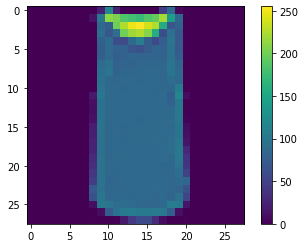

In [6]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  8

In [8]:
print(y_train[2])

0


Normalise colour values to grey scale

In [9]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

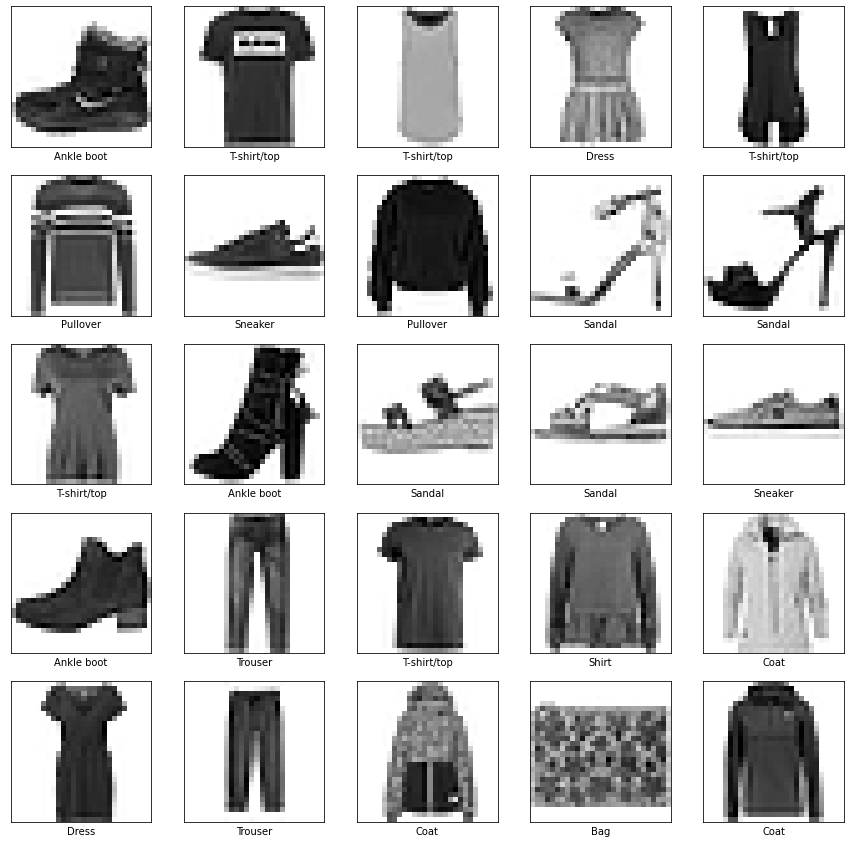

In [10]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

ANN Model

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5020 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3743 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3333 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2929 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2805 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2495 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [36]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8773999810218811


In [25]:
model_low_LR = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model_low_LR.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_low_LR.learning_rate = 0.01
model_low_LR.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5182 - accuracy: 0.8156
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3775 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3396 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2808 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2554 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2438 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [30]:
test_loss, test_acc = model_low_LR.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8743000030517578


In [26]:
model_high_LR = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model_high_LR.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_high_LR.learning_rate = 5
model_high_LR.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5182 - accuracy: 0.8147
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8619
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.8732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3199 - accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [31]:
test_loss, test_acc = model_high_LR.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8885999917984009


In [27]:
model_low_mv = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model_low_mv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_low_mv.learning_rate = 0.01
model_low_mv.momentum=0.7
model_low_mv.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6054 - accuracy: 0.7935
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8549
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8659
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3471 - accuracy: 0.8730
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.8791
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3204 - accuracy: 0.8840
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8865
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3001 - accuracy: 0.8900
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2935 - accuracy: 0.8931
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.285

In [32]:
test_loss, test_acc = model_low_mv.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8705999851226807


High momentum, seems to gives us a small loss in accuracy for a signifcant reduction in time 

In [28]:
model_high_mv = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model_high_mv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_high_mv.learning_rate = 0.01
model_high_mv.momentum=700
model_high_mv.fit(x=x_train,y=y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6145 - accuracy: 0.7897
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3978 - accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3640 - accuracy: 0.8684
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3430 - accuracy: 0.8746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3286 - accuracy: 0.8804
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.8829
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3078 - accuracy: 0.8866
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2989 - accuracy: 0.8890
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2925 - accuracy: 0.8929
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.285

In [33]:
test_loss, test_acc = model_high_mv.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.864799976348877


In [20]:
x_train=x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train.shape #28*28=784

(60000, 28, 28, 1)

In [39]:
CNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3802 - accuracy: 0.8651
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2574 - accuracy: 0.9066
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2097 - accuracy: 0.9227
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1756 - accuracy: 0.9357
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1476 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1225 - accuracy: 0.9542
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1004 - accuracy: 0.9628
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0811 - accuracy: 0.9703
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0687 - accuracy: 0.9748
Epoch 10/10
1875/1875 [==============================] - 44s 23m

In [38]:
CNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN.fit(x=x_train,y=y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.4467 - accuracy: 0.8395
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2987 - accuracy: 0.8916
Epoch 3/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2537 - accuracy: 0.9066
Epoch 4/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.2201 - accuracy: 0.9186
Epoch 5/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1924 - accuracy: 0.9279
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1688 - accuracy: 0.9364
Epoch 7/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.1506 - accuracy: 0.9432
Epoch 8/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1303 - accuracy: 0.9506
Epoch 9/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1149 - accuracy: 0.9573
Epoch 10/10
1875/1875 [==============================] - 82s 4